# Notebook example

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
df = pd.read_csv('../data/raw/telecom_churn.csv')

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Preparação dos Dados

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

Nosso cliente disponibilizou uma base de dados contendo 7.043 registros de clientes e 21 variáveis. 

O objetivo deste projeto é descobrir o comportamento de churn dos clientes, ou seja, quais clientes estão mais propensos a cancelar o serviço. 

Abaixo, segue uma descrição das variáveis disponíveis:

* customerID: Identificador único do cliente
* gender: Gênero do cliente, podendo ser Male e Female
* SeniorCitizen: Se o cliente é idoso ou não, podendo ser 0 ou 1
* Partner: Se o cliente tem parceiro ou não, podendo ser Yes ou No
* Dependents: Se o cliente tem dependentes ou não, podendo ser Yes ou No
* tenure: Quantidade de meses que o cliente permaneceu na empresa
* PhoneService: Se o cliente tem serviço de telefone ou não, podendo ser Yes ou No
* MultipleLines: Se o cliente tem múltiplas linhas de telefone ou não, podendo ser Yes, No ou No phone service
* InternetService: Se o cliente tem serviço de internet ou não, podendo ser DSL, Fiber optic ou No
* OnlineSecurity: Se o cliente tem serviço de segurança online ou não, podendo ser Yes, No ou No internet service
* OnlineBackup: Se o cliente tem serviço de backup online ou não, podendo ser Yes, No ou No internet service
* DeviceProtection: Se o cliente tem serviço de proteção de dispositivo ou não, podendo ser Yes, No ou No internet service
* TechSupport: Se o cliente tem serviço de suporte técnico ou não, podendo ser Yes, No ou No internet service
* StreamingTV: Se o cliente tem serviço de streaming de TV ou não, podendo ser Yes, No ou No internet service
* StreamingMovies: Se o cliente tem serviço de streaming de filmes ou não, podendo ser Yes, No ou No internet service
* Contract: Tipo de contrato do cliente, podendo ser Month-to-month, One year ou Two year
* PaperlessBilling: Se o cliente tem fatura sem papel ou não, podendo ser Yes ou No
* PaymentMethod: Método de pagamento do cliente, podendo ser Bank transfer (automatic), Credit card (automatic), Electronic check ou Mailed check
* MonthlyCharges: Valor da mensalidade do cliente
* TotalCharges: Valor total pago pelo cliente
* Churn: Se o cliente cancelou o serviço ou não, podendo ser Yes ou No

Churn Rate:
 No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


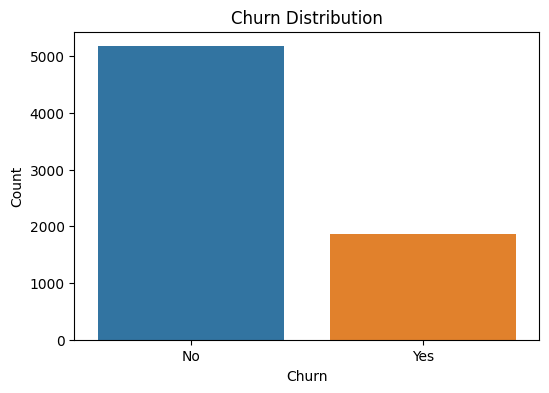

In [42]:
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100

# Display the churn rate
print("Churn Rate:\n", churn_rate)

# Plot the churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


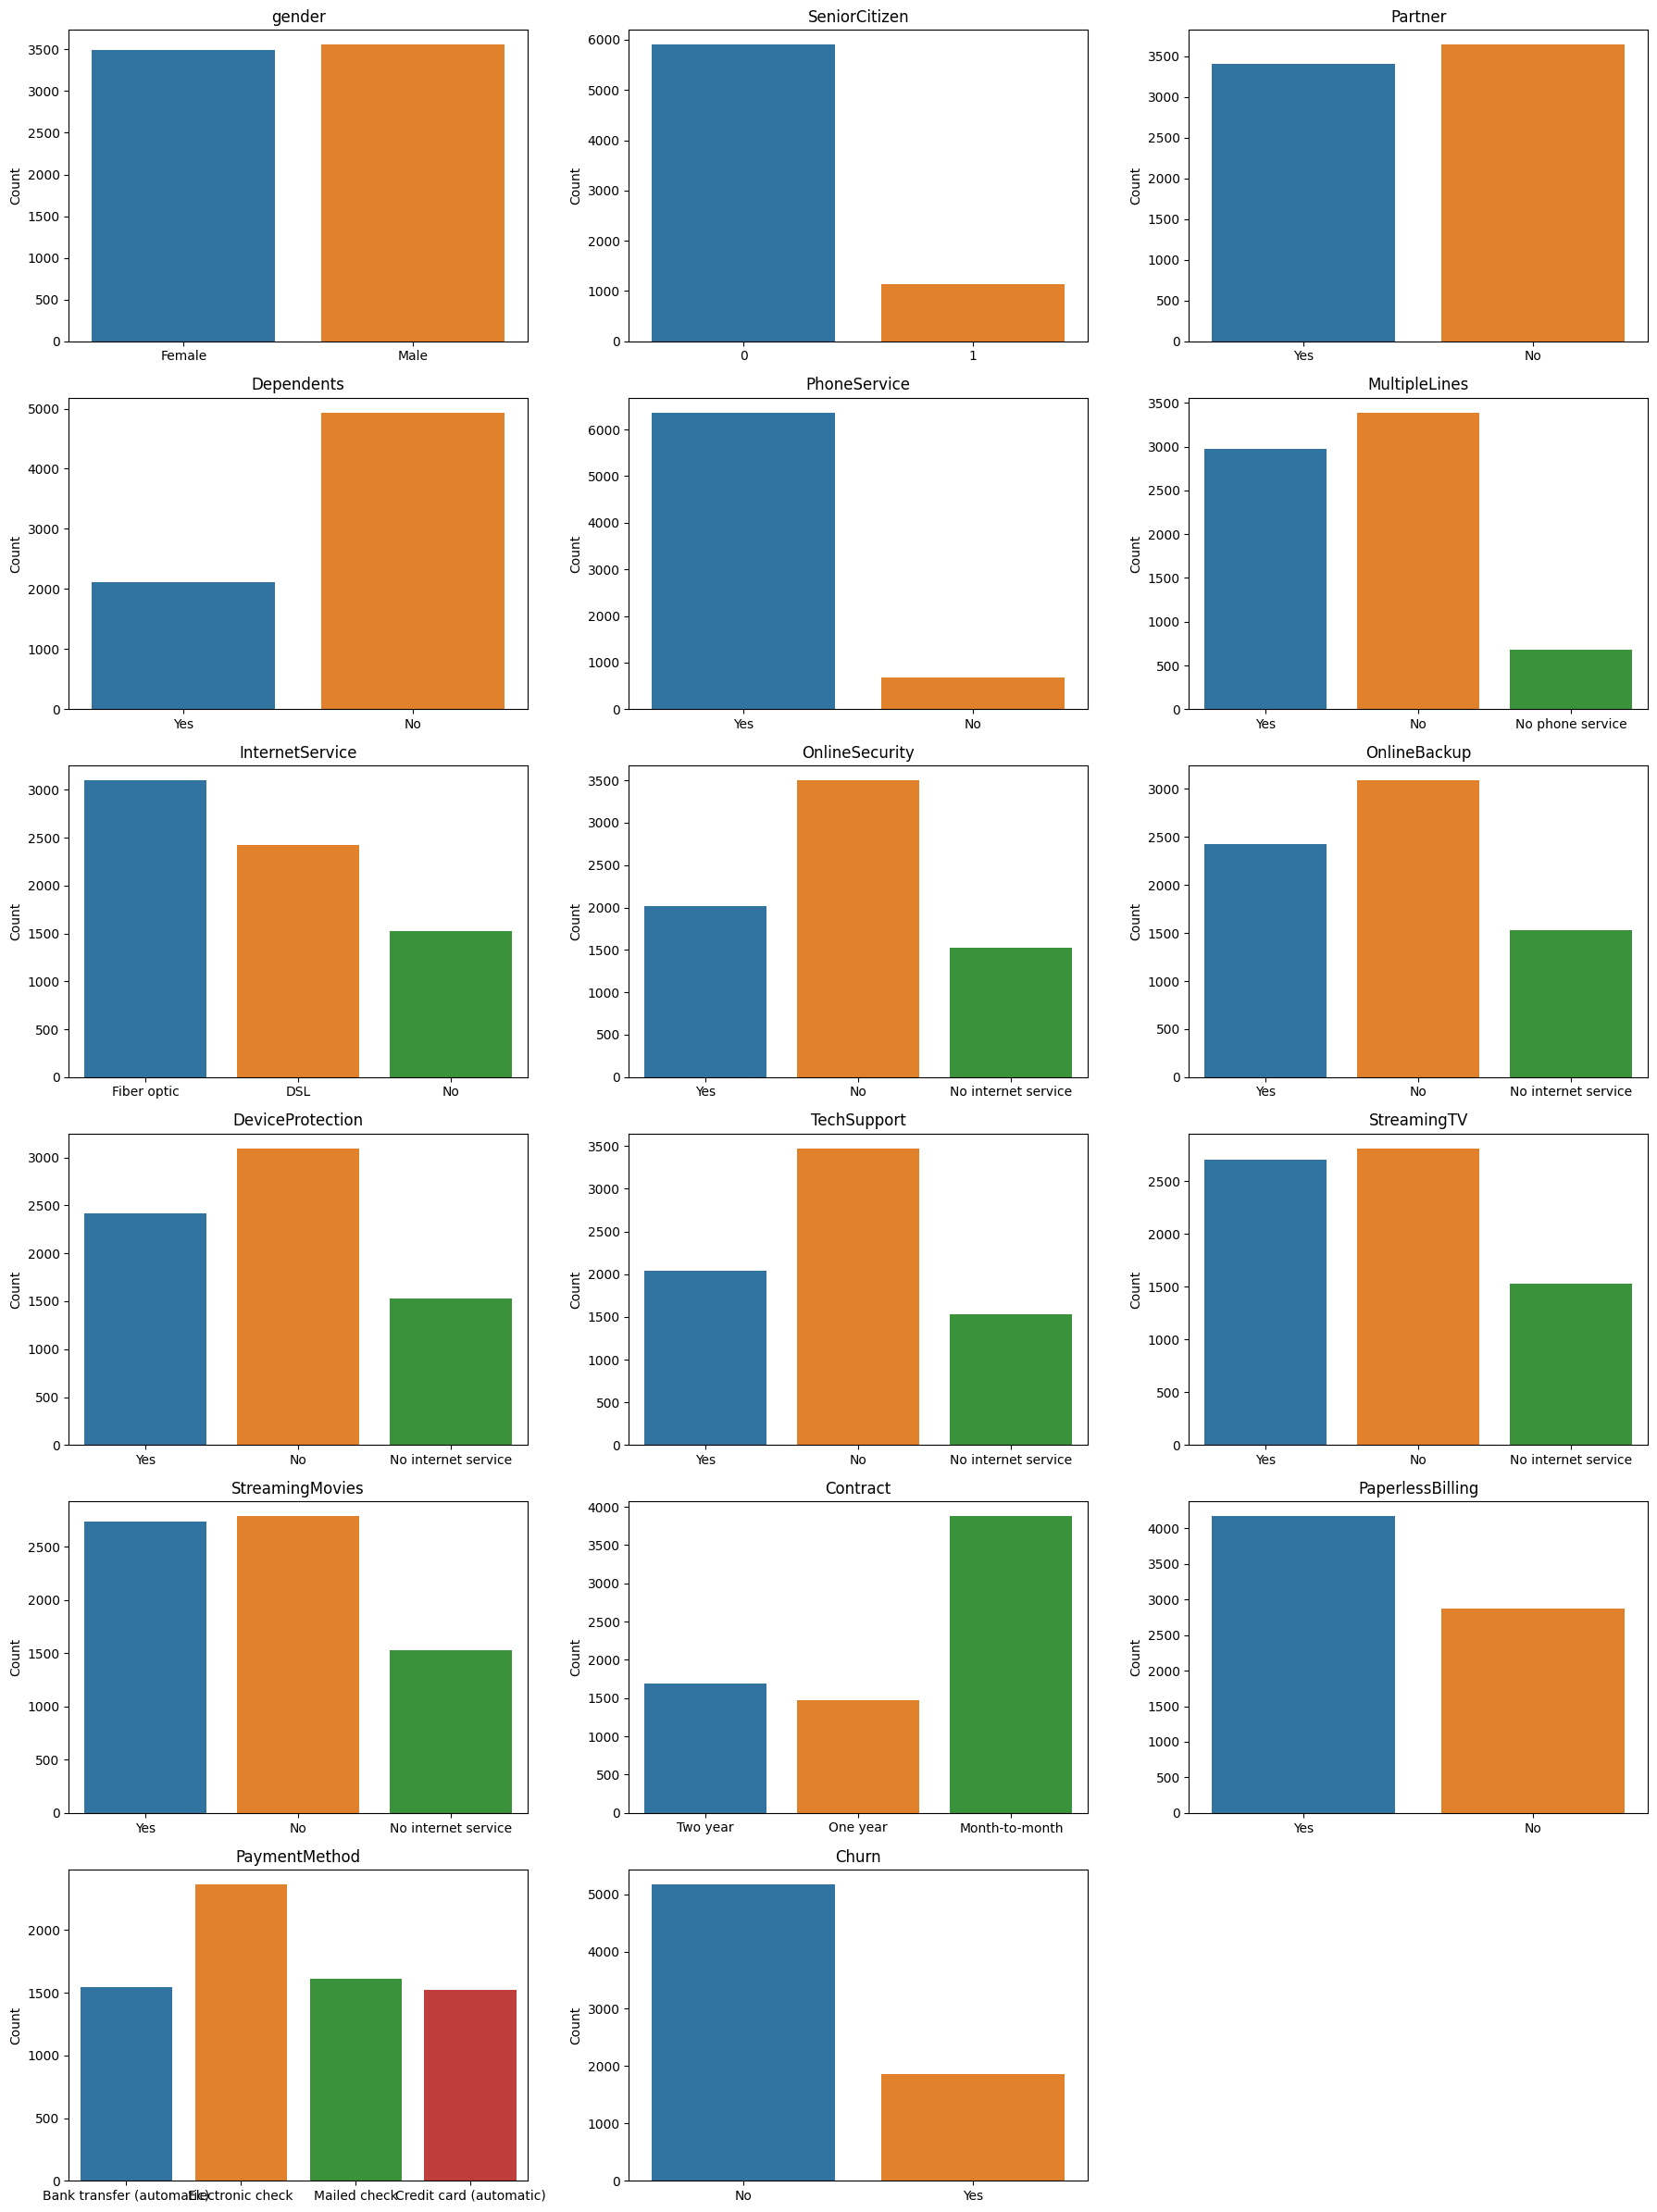

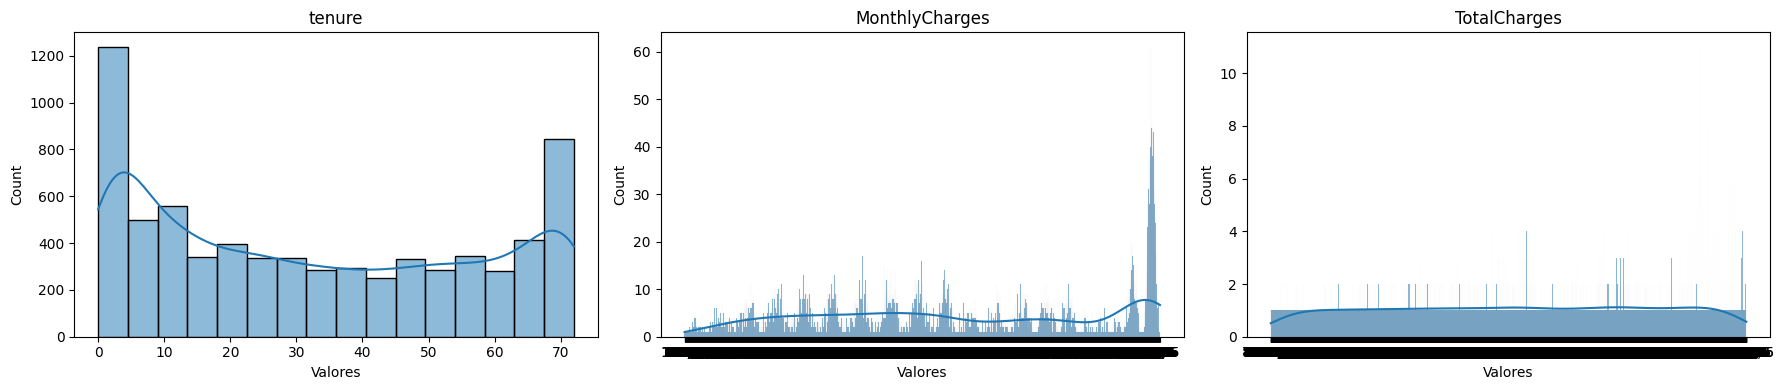

In [43]:
# Select categorical and numerical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot the distribution of categorical variables
plt.figure(figsize=(18, 24))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot the distribution of numerical variables
plt.figure(figsize=(18, 4))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.xlabel("Valores")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [45]:
p = Preprocessing()
df = p.clean_data(df)

INFO:root:Cleaning data


In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


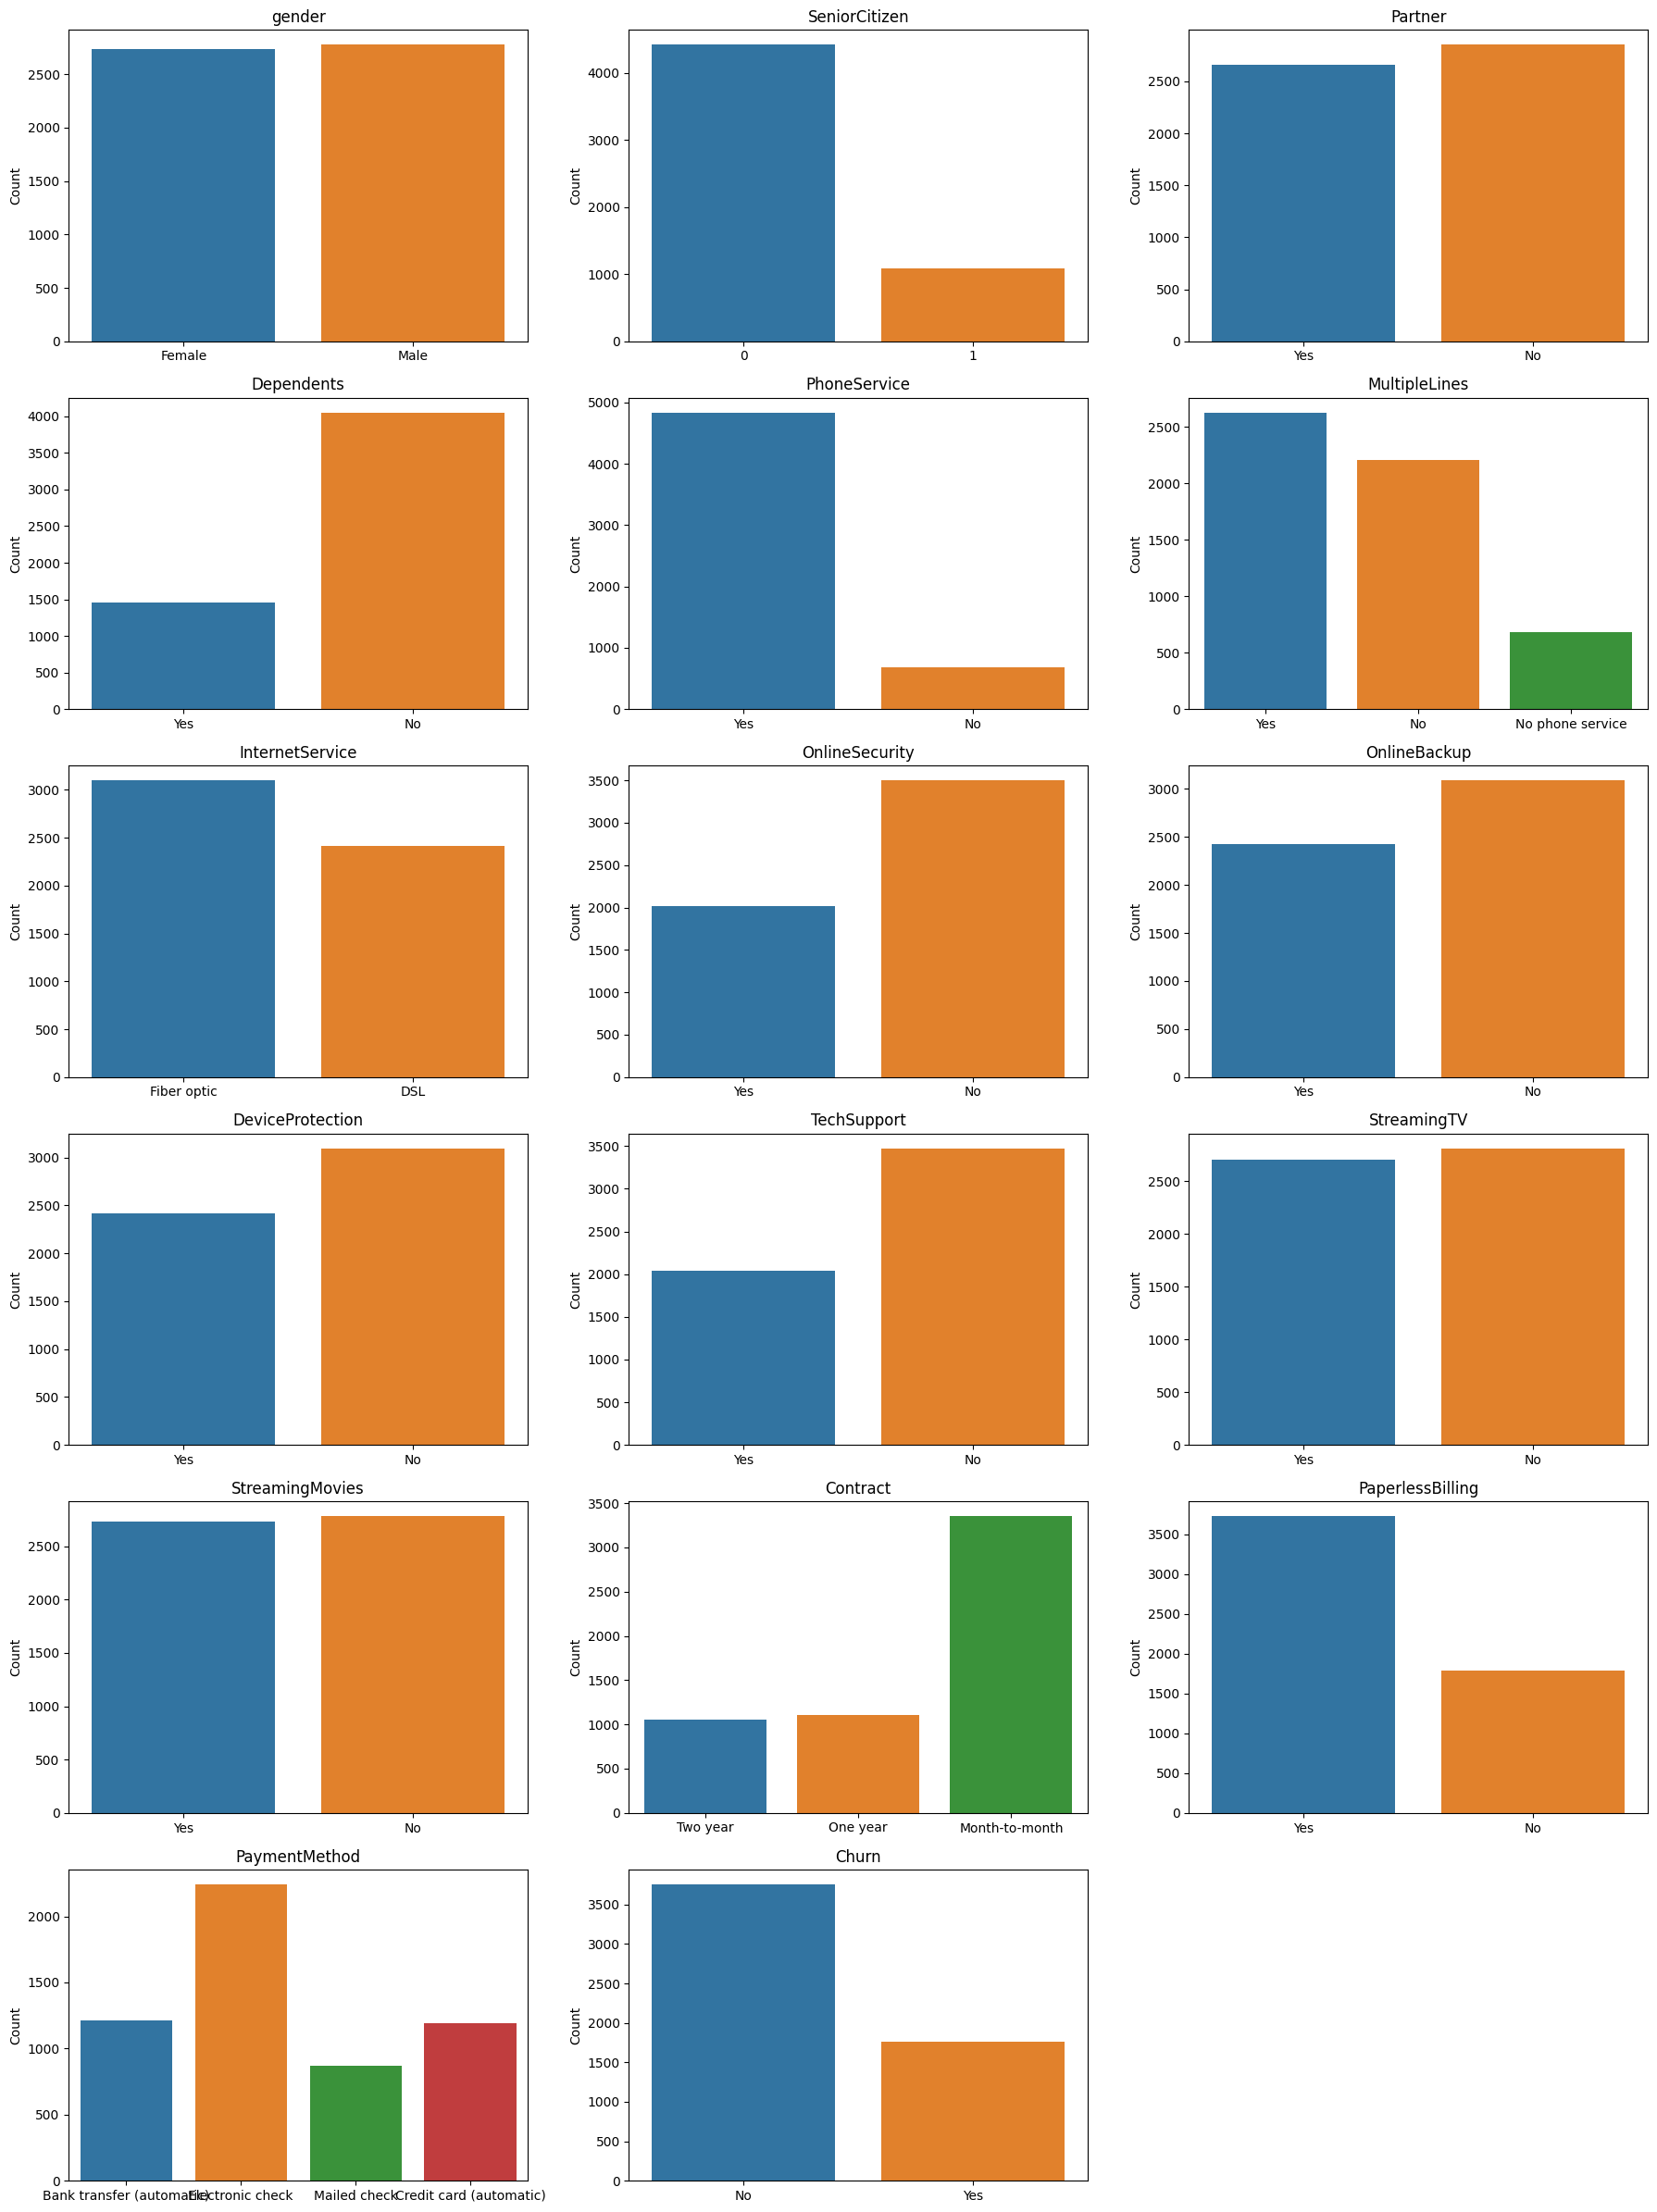

In [47]:
# distribuição das variáveis para os clientes que possuem serviço de internet
df_customers_with_internet = df[df['InternetService'] != 'No']


# Select categorical and numerical columns
categorical_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot the distribution of categorical variables
plt.figure(figsize=(18, 24))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df_customers_with_internet, x=column)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [48]:
# distribuição das variáveis para os clientes que possuem serviço de internet
df_customers_with_internet


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,No
5812,Female,0,No,No,35,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,24.15,812.50,No
5820,Male,0,Yes,No,9,No,No phone service,DSL,No,No,No,No,No,No,One year,No,Bank transfer (automatic),24.10,259.80,Yes
5839,Female,0,No,No,13,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.90,300.80,Yes


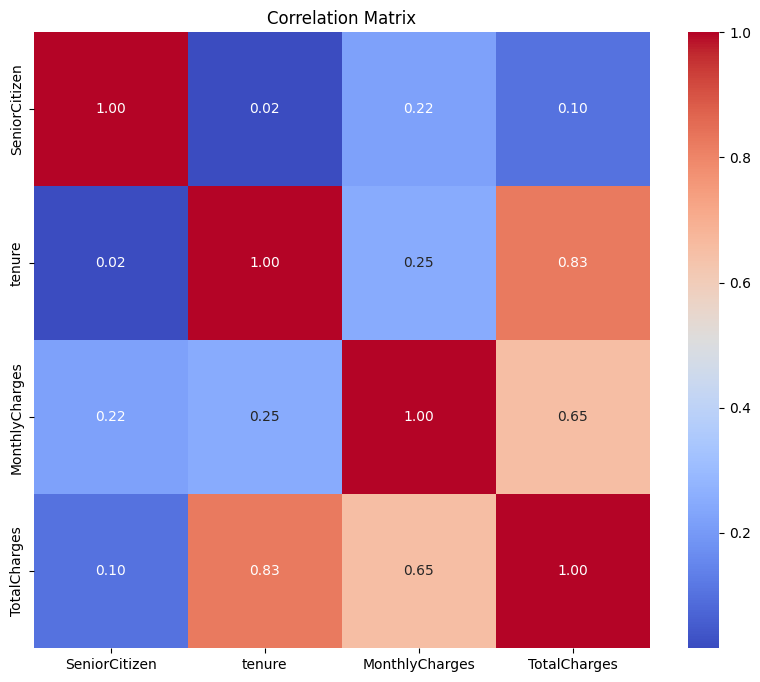

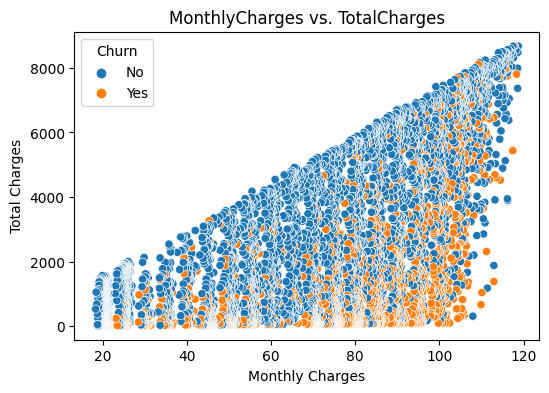

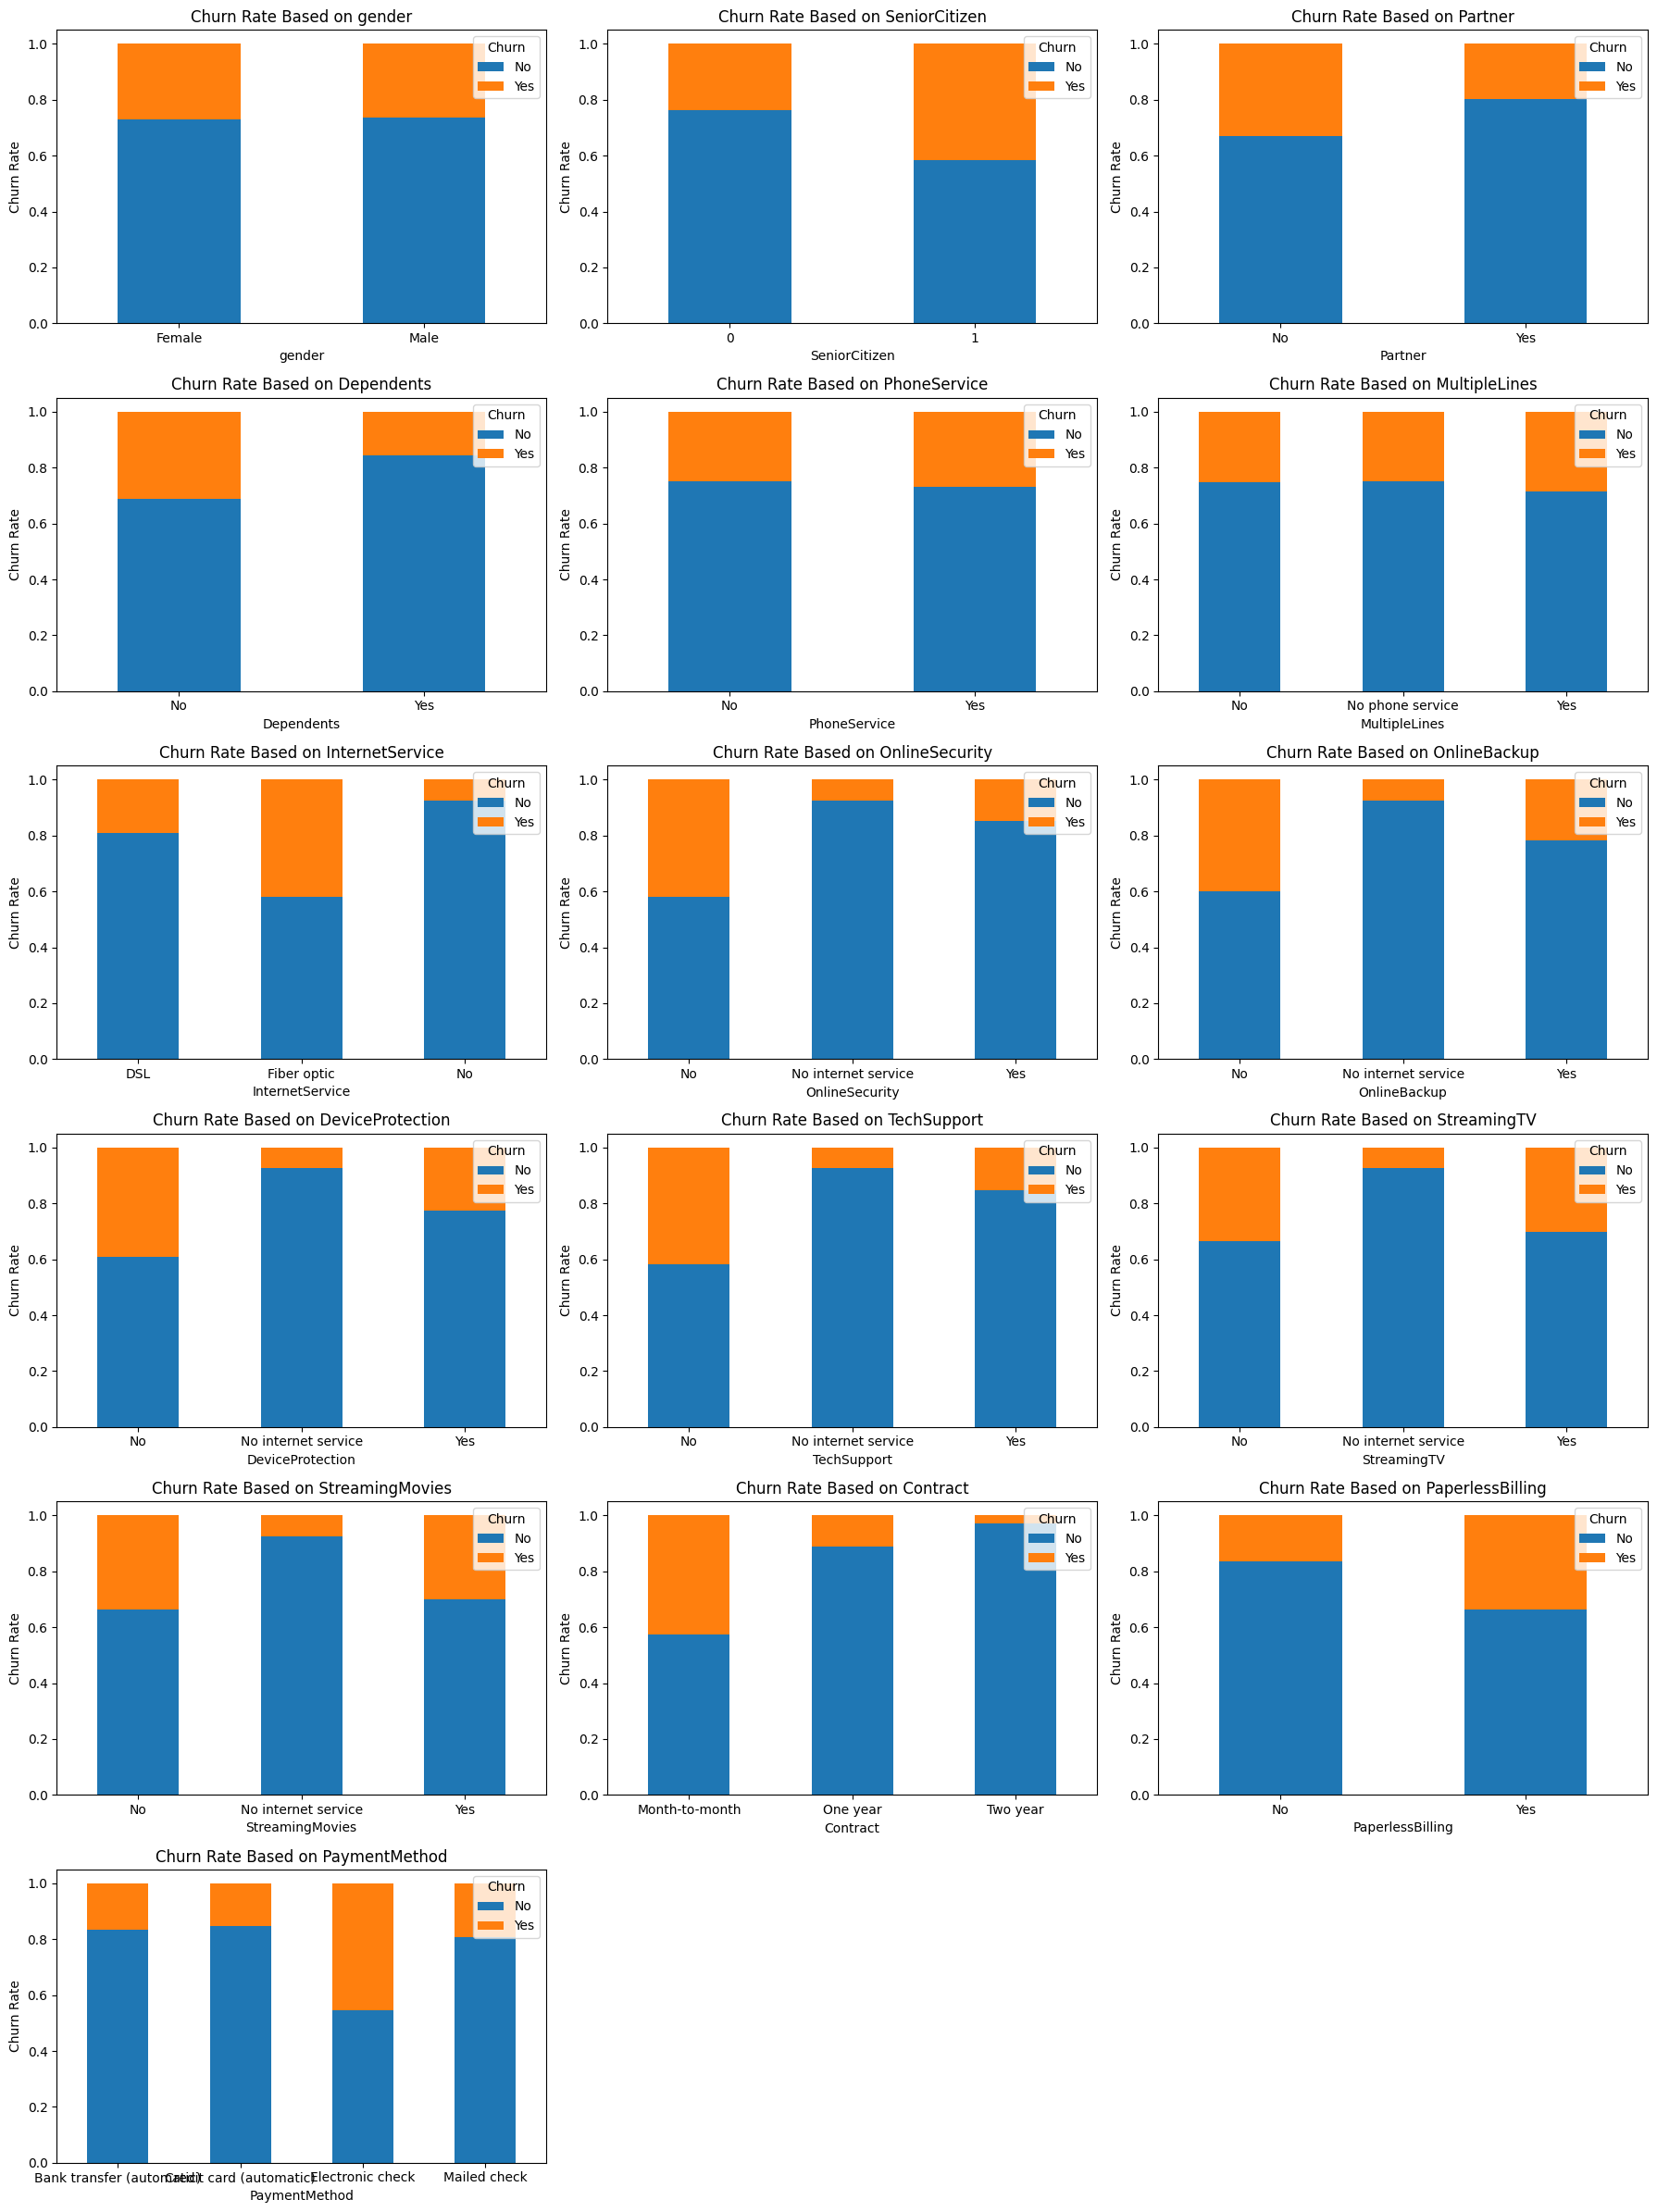

In [14]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

# Plot relationship between MonthlyCharges and TotalCharges
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title("MonthlyCharges vs. TotalCharges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.show()

# Plot churn rate based on each categorical variable
plt.figure(figsize=(18, 24))
for i, column in enumerate(categorical_cols[:-1], 1):
    plt.subplot(6, 3, i)
    churn_rate_by_category = df.groupby(
        column)['Churn'].value_counts(normalize=True).unstack()
    churn_rate_by_category.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f"Churn Rate Based on {column}")
    plt.xlabel(column)
    plt.ylabel("Churn Rate")
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Dados duplicados

In [64]:
df.duplicated().sum()

0

### Dados Categóricos

In [65]:
p = Preprocessing()
df = p.clean_data(df)

INFO:root:Cleaning data


In [66]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}\n')
        print(f'{df[col].value_counts(normalize=True)}')


gender

Male      0.504693
Female    0.495307
Name: gender, dtype: float64
Partner

No     0.517491
Yes    0.482509
Name: Partner, dtype: float64
Dependents

No     0.701507
Yes    0.298493
Name: Dependents, dtype: float64
PhoneService

Yes    0.903299
No     0.096701
Name: PhoneService, dtype: float64
MultipleLines

No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: MultipleLines, dtype: float64
InternetService

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: InternetService, dtype: float64
OnlineSecurity

No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: OnlineSecurity, dtype: float64
OnlineBackup

No                     0.438993
Yes                    0.344852
No internet service    0.216155
Name: OnlineBackup, dtype: float64
DeviceProtection

No                     0.439989
Yes                    0.343857
No internet service    0.216155
Name: DeviceProtection,

In [67]:
# onehot-encode categorical variables
df = p.categ_encoding(df)

INFO:root:Category encoding


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   uint8  
 1   Partner                                  7032 non-null   uint8  
 2   Dependents                               7032 non-null   uint8  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   uint8  
 5   MultipleLines                            7032 non-null   uint8  
 6   OnlineSecurity                           7032 non-null   uint8  
 7   OnlineBackup                             7032 non-null   uint8  
 8   DeviceProtection                         7032 non-null   uint8  
 9   TechSupport                              7032 non-null   uint8  
 10  StreamingTV                              7032 no

In [69]:
sns.pairplot(df, hue='Churn')
plt.show()


KeyboardInterrupt: 

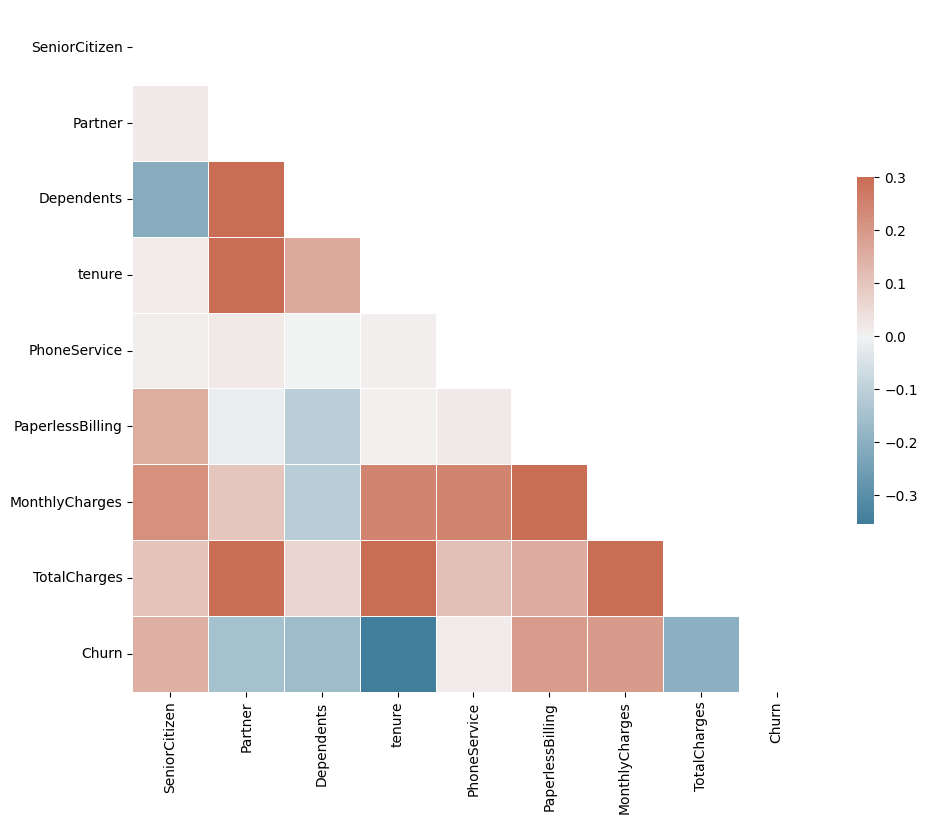

In [ ]:
corrmat = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [ ]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [ ]:
# Ensure the same random state passed to TrainerSkleran().train()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((499, 6), (215, 6), (499,), (215,))

In [ ]:
rf = TrainerSklearn().train(X, y, classification=True, 
                            algorithm=RandomForestClassifier, 
                            preprocessing=p,
                           data_split=('train_test', {'test_size':.3}),
                           random_state=123)

INFO:interpret_community.TabularExplainer:Initialized valid explainer TreeExplainer with args {'explain_subset': None, 'features': ['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'], 'classes': None}


In [ ]:
rf.get_metrics()

{'accuracy': 0.7767441860465116,
 'f1': 0.7272727272727273,
 'precision': 0.735632183908046,
 'recall': 0.7191011235955056,
 'roc_auc': 0.8491171749598716}

In [ ]:
rf.get_columns()

['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']

In [ ]:
rf.predict_proba(X_test, binary=True)

array([1.        , 0.47116667, 0.518     , 0.99666667, 0.58      ,
       0.        , 0.08706678, 0.        , 0.045     , 0.97      ,
       0.66058333, 0.12088798, 0.12088798, 0.99      , 0.82416667,
       0.28875   , 0.        , 0.60293432, 1.        , 0.        ,
       0.02688095, 1.        , 0.55566667, 0.76868254, 0.97      ,
       1.        , 0.0058422 , 1.        , 0.0075    , 0.1906815 ,
       0.        , 0.        , 1.        , 0.07107984, 0.        ,
       0.98166667, 0.60293432, 0.08376543, 0.18225144, 0.        ,
       0.03833333, 0.        , 0.30304762, 0.04      , 1.        ,
       0.4175    , 0.06      , 1.        , 1.        , 0.35062302,
       0.08706678, 0.99      , 0.        , 0.09      , 1.        ,
       0.60293432, 1.        , 0.        , 0.12088798, 0.00375   ,
       1.        , 1.        , 0.08706678, 0.        , 0.32579762,
       0.00875   , 0.00375   , 1.        , 0.        , 0.60293432,
       0.08706678, 0.09      , 0.3525    , 0.47416667, 0.60105

In [ ]:
# Predicting new data
def predict_new(X, model, probs=True):
    X = p.clean_data(X)
    X = p.categ_encoding(X)
    
    columns = model.get_columns()
    for col in columns:
        if col not in X.columns:
            X[col] = 0
    print(X)
    if probs:
        return model.predict_proba(X)
    else:
        return model.predict(X)

In [ ]:
new_data = pd.DataFrame({
    'Pclass':3,
    'Sex': 'male',
    'Age':4
}, index=[0])

new_data

,Pclass,Sex,Age
0,3,male,4


In [ ]:
predict_new(new_data, rf)

INFO:root:Cleaning data
INFO:root:Category encoding


   Age  Pclass_3  Sex_male  Pclass_1  Pclass_2  Sex_female
0    4         1         1         0         0           0


array([[0.52583333, 0.47416667]])

**Get local explainer for each instance:**

In [ ]:
# Get local explainer
res = rf.local_interpret(X_test, len(X_test.columns))

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
res

,Importance_Name_0,Importance_Name_1,Importance_Name_2,Importance_Name_3,Importance_Name_4,Importance_Name_5,Importance_Value_0,Importance_Value_1,Importance_Value_2,Importance_Value_3,Importance_Value_4,Importance_Value_5
0,Sex_female,Sex_male,Pclass_3,Pclass_2,Age,Pclass_1,1.0,0.986716,0.578907,0.271069,0.257027,0.0
1,Sex_female,Sex_male,Age,Pclass_2,Pclass_3,Pclass_1,1.0,0.965407,0.607668,0.488671,0.356583,0.0
2,Sex_female,Sex_male,Age,Pclass_2,Pclass_1,Pclass_3,1.0,0.963406,0.909294,0.388801,0.282151,0.0
3,Age,Sex_male,Sex_female,Pclass_2,Pclass_1,Pclass_3,1.0,0.969472,0.917643,0.166757,0.062946,0.0
4,Pclass_1,Age,Pclass_3,Pclass_2,Sex_male,Sex_female,1.0,0.818185,0.713251,0.559959,0.050245,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Age,Sex_female,Sex_male,Pclass_3,Pclass_2,Pclass_1,1.0,0.857279,0.794271,0.056703,0.012450,0.0
211,Sex_female,Sex_male,Age,Pclass_1,Pclass_3,Pclass_2,1.0,0.936626,0.677348,0.439749,0.281057,0.0
212,Sex_female,Sex_male,Pclass_1,Pclass_2,Age,Pclass_3,1.0,0.905212,0.709439,0.669674,0.350026,0.0
213,Sex_female,Sex_male,Pclass_3,Pclass_1,Pclass_2,Age,1.0,0.969143,0.965335,0.818807,0.789892,0.0


**Data Quality:**

In [ ]:
from src.preprocessing import DataDrift
import great_expectations as ge

In [ ]:
df = Spreadsheet().get_data('../data/raw/train.csv')

In [ ]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=123)
X_train.shape, X_test.shape

((623, 4), (268, 4))

In [ ]:
dq = DataDrift(discrete_cat_cols=['Sex', 'Pclass'])
df_ge = dq.check(X_train, target='Survived')

In [ ]:
df_ge.save_expectation_suite('../data/output/expectations.json')

INFO:great_expectations.data_asset.data_asset:	7 expectation(s) included in expectation_suite. Omitting 1 expectation(s) that failed when last run; set discard_failed_expectations=False to include them. result_format settings filtered.


In [ ]:
X_test.drop(columns=['Survived'], inplace=True)
df_ge = ge.dataset.PandasDataset(X_test)
ge_val = df_ge.validate(expectation_suite='../data/output/expectations.json', only_return_failures=False)

In [ ]:
ge_val

{
  "statistics": {
    "evaluated_expectations": 7,
    "successful_expectations": 7,
    "unsuccessful_expectations": 0,
    "success_percent": 100.0
  },
  "results": [
    {
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "result": {
        "observed_value": [
          "Pclass",
          "Sex",
          "Age"
        ]
      },
      "success": true,
      "expectation_config": {
        "expectation_type": "expect_table_columns_to_match_ordered_list",
        "meta": {},
        "kwargs": {
          "column_list": [
            "Pclass",
            "Sex",
            "Age"
          ]
        }
      },
      "meta": {}
    },
    {
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "result": {
        "element_count": 268,
        "unexpected_count": 0,
        "unexpected_percent":

**Hypothesis testing**

In [ ]:
import pandas as pd
from src.analysis import HTestAutoPilot, HypothesisTester

2021-12-22 22:37:12.130752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 22:37:12.130776: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
invalid escape sequence \s
invalid escape sequence \s
invalid escape sequence \s


In [ ]:
df = Spreadsheet().get_data('../data/raw/train.csv')

In [ ]:
survived_age = df[(df.Survived == 1) & (df.Age.notnull())].Age.values
not_survived_age = df[(df.Survived == 0)  & (df.Age.notnull())].Age.values

At least one of the samples is not normally distributed and due to the number of observations the central limit theorem does not apply. In this case, the Mann-Whitney test is used as it does not make any assumptions about data ditribution (non-parametric alternative)


,T-test,MWU
T,-2.04603,-
dof,598.841215,-
cohen-d,0.157486,-
BF10,0.657,-
power,0.541418,-
U-val,-,57682.0
RBC,-,0.061776
CLES,-,0.469112
p-val,0.04119,0.160493
CI95%,"[-4.47, -0.09]","[-4.0, 1.0]"


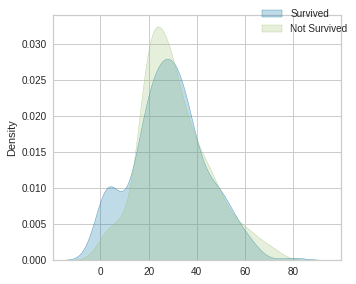

In [ ]:
# If you want to compare distributions, but you are not sure if the data satisfy the parametric test conditions, 
# you can call the HTestAutoPilot Class.
# It will help you in this decision.
HTestAutoPilot.independent_difference(survived_age, not_survived_age, label1='Survived', label2='Not Survived')

In [ ]:
# If you know which test to use, you can call it directly from the HypothesisTester Class
HypothesisTester.t_test(survived_age, not_survived_age, show_graph=False)

,T-test
T,-2.04603
dof,598.841215
alternative,two-sided
p-val,0.04119
CI95%,"[-4.47, -0.09]"
cohen-d,0.157486
BF10,0.657
power,0.541418
H0,difference in mean equal to zero
H1,difference in mean not equal to zero


**Dimensionality Reduction**

In [ ]:
import pandas as pd
import numpy as np
from src.analysis import DimensionalityReducer

df = pd.DataFrame({'Col_1': [-1, -2, -3, 1, 2, 3], 'Col_2': [-1, -1, -2, 1, 1, 2], 'Col_3': [-5, -4, -3, 2, 1, 1]})

import pandas as pd
import numpy as np
from src.analysis import DimensionalityReducer

import pandas as pd
import numpy as np
from src.analysis import DimensionalityReducer

import pandas as pd
import numpy as np
from src.analysis import DimensionalityReducer

In [ ]:
import pandas as pd
import numpy as np
from src.analysis import DimensionalityReducer

In [ ]:
df = pd.DataFrame({'Col_1': [-1, -2, -3, 1, 2, 3], 'Col_2': [-1, -1, -2, 1, 1, 2], 'Col_3': [-5, -4, -3, 2, 1, 1]})

In [ ]:
df

,Col_1,Col_2,Col_3
0,-1,-1,-5
1,-2,-1,-4
2,-3,-2,-3
3,1,1,2
4,2,1,1
5,3,2,1


In [ ]:
dm = DimensionalityReducer(reducer='pca', columns=['Col_1', 'Col_2'], k=1)

In [ ]:
dm.fit_transform(df, y='Col_3')

Explained variance (prefix_0): 0.9924428900898052


,Col_3,prefix_0
0,-5,1.383406
1,-4,2.221898
2,-3,3.605304
3,2,-1.383406
4,1,-2.221898
5,1,-3.605304


In [ ]:
# Survival analysis for tenure and churn



#todo
    - [ ] criar um apresentacao para o projeto
    - [ ] criar um readme para o projeto
    - [ ] criar Examine the distribution of categorical and numerical variables.
    - [ ] Analyze the target variable ('Churn') to understand the churn rate.
    - [ ] T-SNE para todos os dados
    - [ ] Survival analysis for tenure and churn
    - [ ] Explore relationships between variables using visualizations and summary statistics.
    - [ ] Reduzir dimensionalidade
    - [ ] Treinar o modelo
    - [ ] Testar o modelo

# A3 data primary colors

```python 
#0C3AE8
#061D74
#F5009C
```